In [7]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset

In [8]:
# inherits Dataset from torch.utils.data
class GP(Dataset):
    """
    Dataset of functions f(x) = a * sin(x - b) where a and b are randomly
    sampled. The function is evaluated from -pi to pi.

    Parameters
    ----------
    amplitude_range : tuple of float
        Defines the range from which the amplitude (i.e. a) of the sine function
        is sampled.

    shift_range : tuple of float
        Defines the range from which the shift (i.e. b) of the sine function is
        sampled. (horizontal shift)

    num_samples : int
        Number of samples of the function contained in dataset.

    num_points : int
        Number of points at which to evaluate f(x) for x in [-pi, pi].
    """
    def __init__(self, amplitude_range = (-1., 1.), shift_range = (-.5, .5),
                 num_samples = 1000, num_points = 100):
        self.amplitude_range = amplitude_range
        self.shift_range = shift_range
        self.num_samples = num_samples
        self.num_points = num_points
        self.x_dim = 1  # x and y dim are fixed for this dataset.
        self.y_dim = 1

        # Generate data
        self.data = []
        a_min, a_max = amplitude_range
        b_min, b_max = shift_range
        for i in range(num_samples):
            # Sample random amplitude
            a = (a_max - a_min) * np.random.rand() + a_min
            # Sample random shift
            b = (b_max - b_min) * np.random.rand() + b_min
            # Shape (num_points, x_dim)
            x = torch.linspace(-pi, pi, num_points).unsqueeze(1)
            # Shape (num_points, y_dim)
            y = a * torch.sin(x - b)
            self.data.append((x, y))

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.num_samples

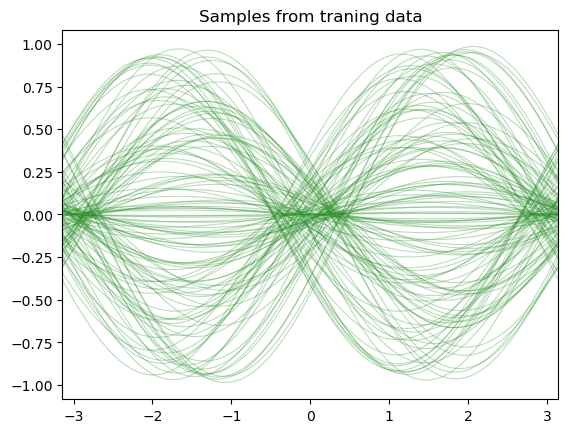

In [9]:
# num_samples: number of different draws
# num_points: x spacing
dataset = GP(num_samples = 4000, num_points = 200)

# Visualize all data samples
for i in range(127):
    x, y = dataset[i] 
    plt.plot(x.numpy(), y.numpy(), c = 'forestgreen', alpha = 0.3, linewidth = '.8')
    plt.title("Samples from traning data")
    plt.xlim(-pi, pi)